In [1]:
import parser
import tensorflow as tf
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
chain = parser.Chain('MSA')
print(chain)

Chain(3 residues, 41 atoms, 40 bonds)


In [3]:
gradient_multiplier = 0.1
steps = 100

optimizer = tf.optimizers.Adam(learning_rate=gradient_multiplier)

for step in range(steps):
    with tf.GradientTape() as tape:
        energy = chain.get_energy(normalize=True)
        gradient = tape.gradient(energy, chain.get_variables())
    optimizer.apply_gradients(zip(gradient, chain.get_variables()))
    
    if step % (steps // 10) == 0:
        print(f'Step {step}: {energy.numpy()}')

Step 0: 0.26203644275665283
Step 10: 0.019538041204214096
Step 20: 0.005192255601286888
Step 30: 0.0021500696893781424
Step 40: 0.0012269046856090426
Step 50: 0.000818846863694489
Step 60: 0.0005683820345439017
Step 70: 0.0005022713448852301
Step 80: 0.0004617211234290153
Step 90: 0.0004481340292841196


<IPython.core.display.Javascript object>


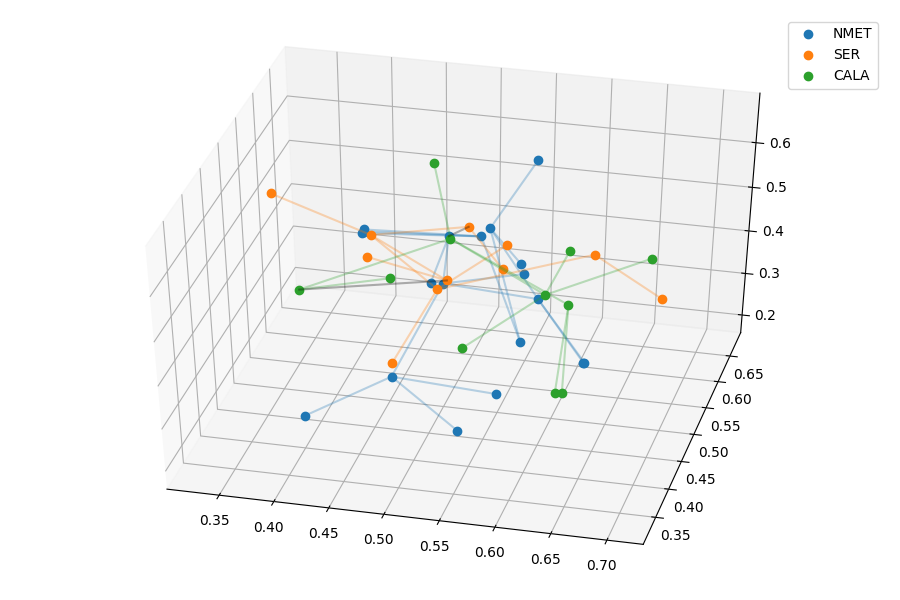

In [4]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

for res in chain.residues:
    pos = np.array([atom.pos.numpy() for atom in res.atoms])
    col = ax.plot(pos[:,0], pos[:,1], pos[:,2], 'o', label=res.name)[0].get_color()

    for bond in res.bonds:
        pos = np.array([bond[0].pos.numpy(), bond[1].pos.numpy()])
        ax.plot(pos[:,0], pos[:,1], pos[:,2], c=col, alpha=0.3)
        
for bond in chain.external_bonds:
    pos = np.array([bond[0].pos.numpy(), bond[1].pos.numpy()])
    ax.plot(pos[:,0], pos[:,1], pos[:,2], c='black', alpha=0.3)
    
plt.legend()
plt.tight_layout()
plt.show()